# <center>流失模型</center>
<p style="text-align:right"> --- by 石小秀</p>

众所周知，现在互联网的获客成本比5年前高了3，5倍不止。尤其是金融行业的新用户获取成本，甚至可能达到百元之多。而且，更心酸的是，即使公司花费了高价获取了新用户，也可能仅仅是打开一次app，或者完成一次交易后就白白流失。

居高不下的获客成本让互联网公司必须重视用户的流失以及留存，延长每一个客户的生命周期价值。因此研究用户流失模型对于数据分析和公司发展而言，十分重要。

那么同学们，我们今天学的这个流失模型对大家以后工作有多重要，就不言自明了。

**课程内容**
- 缺失值处理
- 数值型数据的多重共线性检验
- 如何处理多重共线性  1）删除共线性的变量  2）PCA降维算法

In [13]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据

In [36]:
CV_data = pd.read_csv('churn-bigml-80.csv')                       
CV_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Deal with missing data

In [27]:
CV_data[CV_data.isnull().values == True]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn


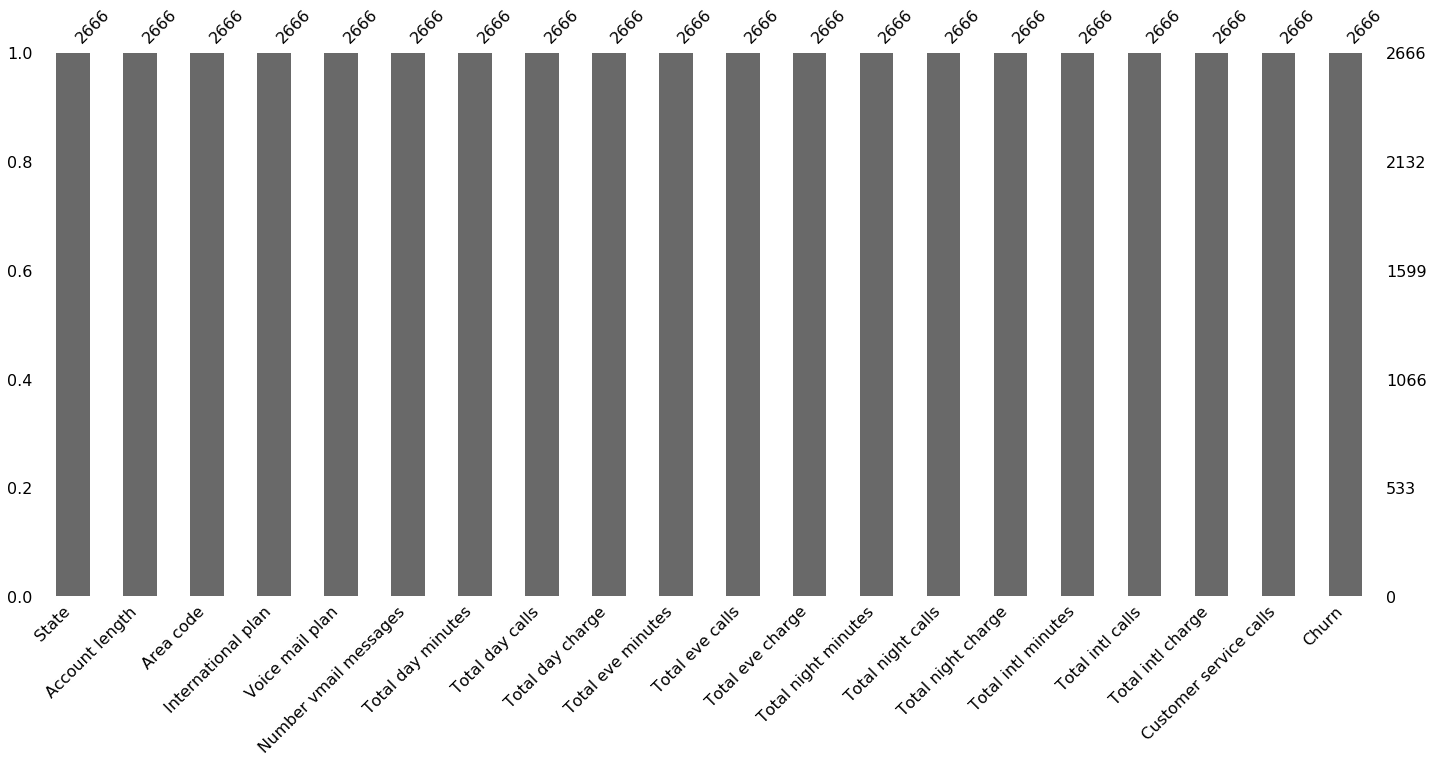

In [5]:
import missingno as msno
columns = CV_data.columns
msno.bar(CV_data[columns])

## 如何处理na值
- dropna()
- 用均值，中位数，或者随机森林预测值进行填充

# 数据类型转换

## 数据类型

In [31]:
for i in CV_data.columns:
    if CV_data[i].dtype=='O':
        print(i)

State
International plan
Voice mail plan


**lamda匿名函数**

In [37]:
#pd.get_dummies(CV_data['State'], prefix='State')
CV_data['International plan'] = CV_data['International plan'].apply(lambda x:0 if x=='No' else 1)
CV_data['Voice mail plan'] = CV_data['Voice mail plan'].apply(lambda x:0 if x=='No' else 1)

In [33]:
CV_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [39]:
CV_data['International plan'].dtype

dtype('int64')

In [40]:
CV_data['Voice mail plan'].dtype

dtype('int64')

## Correlation

In [6]:
# category
CV_data['State'].dtype

dtype('O')

In [49]:
cat_columns = [col for col in CV_data.columns.values if CV_data[col].dtype == 'O']
cat_columns.extend(['Churn'])
cat_columns

['State', 'Churn']

In [50]:
num = CV_data.drop(columns=cat_columns,axis=1)
# num = num.drop(columns=['Churn'],axis=1)
num.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [63]:
y_label = CV_data['Churn'].to_frame()
y_label['Churn'] = y_label['Churn'].apply(lambda x:int(x))
y_label.head()

,Churn
0,0
1,0
2,0
3,0
4,0


In [52]:
CV_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [53]:
CV_data.corr()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.008620,0.024500,0.002448,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455,0.017728
Area code,-0.008620,1.000000,0.047099,0.007180,-0.000584,-0.023134,-0.009629,-0.023130,0.000679,-0.018602,0.000707,-0.003353,0.011455,-0.003382,-0.013418,-0.027423,-0.013534,0.034442,0.001019
International plan,0.024500,0.047099,1.000000,0.002131,0.005858,0.049550,-0.004277,0.049555,0.026616,0.010277,0.026623,-0.010310,0.018081,-0.010316,0.053162,0.011549,0.053037,-0.035955,0.277489
Voice mail plan,0.002448,0.007180,0.002131,1.000000,0.957159,0.013438,-0.007541,0.013439,0.019132,0.003404,0.019147,0.001065,0.013985,0.001066,-0.013963,0.015196,-0.013931,-0.022054,-0.099291
Number vmail messages,-0.002996,-0.000584,0.005858,0.957159,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787,-0.086474
Total day minutes,0.002847,-0.023134,0.049550,0.013438,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543,0.195688
Total day calls,0.038862,-0.009629,-0.004277,-0.007541,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945,0.018290
Total day charge,0.002843,-0.023130,0.049555,0.013439,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548,0.195689
Total eve minutes,-0.015923,0.000679,0.026616,0.019132,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192,0.072906
Total eve calls,0.018552,-0.018602,0.010277,0.003404,0.005131,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000,0.001058,-0.001539


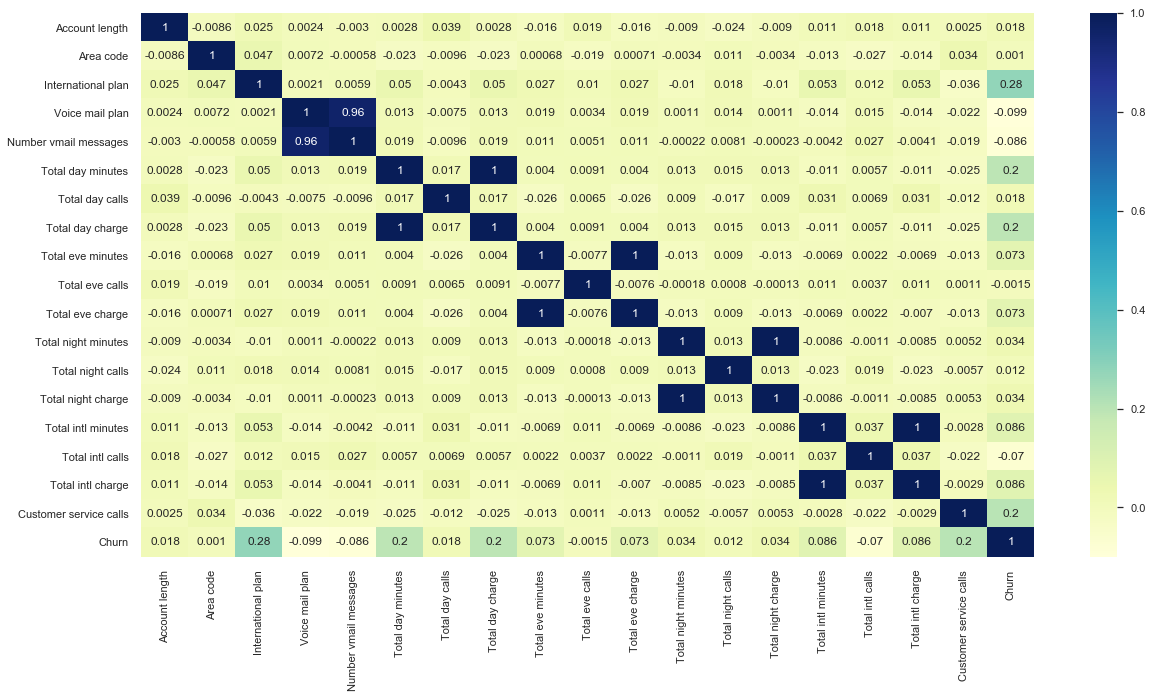

In [59]:
corr_matrix = CV_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)

In [64]:
CV_data.groupby(['Customer service calls','Churn']).count()['State'].to_frame().rename(columns={'State':'counts'})


counts
Customer service calls Churn        
0                      False     476
                       True       79
1                      False     846
                       True       99
2                      False     546
                       True       62
3                      False     311
                       True       37
4                      False      69
                       True       64
5                      False      20
                       True       29
6                      False       7
                       True       10
7                      False       3
                       True        5
8                      True        1
9                      True        2

In [58]:
# corr_matrix = num.corr()
# cols = num.columns
# cm = np.corrcoef(num[cols].values)
# plt.figure(figsize=(20,10))
# sns.set(font_scale=1)
# sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)
# plt.show()